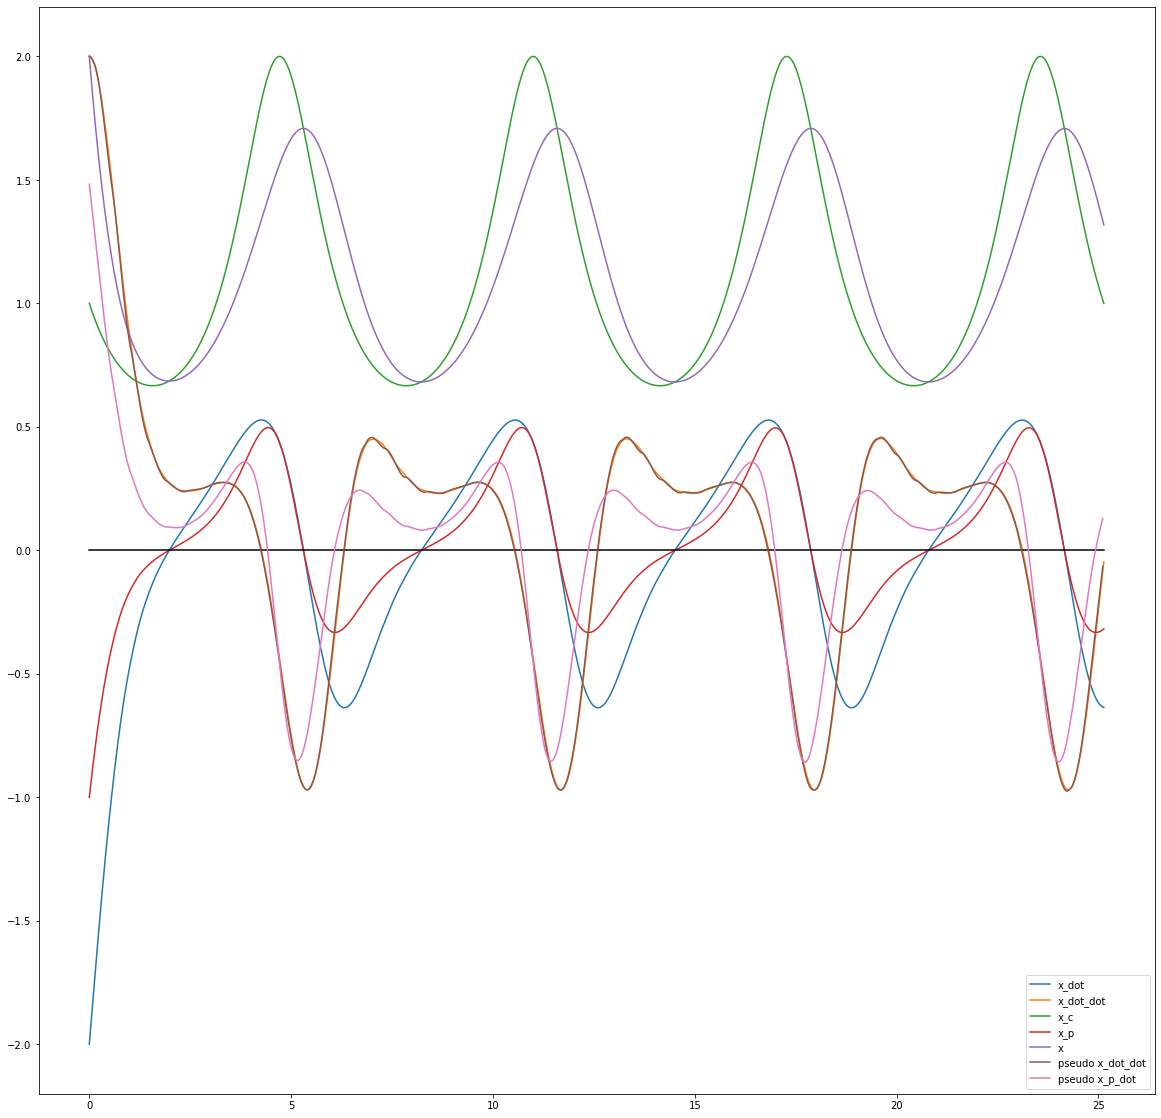

In [18]:
from sympy import diff,Matrix,Function,var,sin,cos,lambdify,exp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

var("t x")
k=sin(t)+2
#k=3+t-t
#u=cos(t)+2
#u=exp(t/10)+2
u=2
x_dot=u-k*x
x_c=1/k*u
x_p=x_c-x
x_of_t=Function("x")(t)
x_dot_of_t=x_dot.subs({x: x_of_t})
x_dot_dot_sym=diff(x_dot_of_t,t)


x_dot_dot=x_dot_dot_sym.subs({diff(x_of_t,t):x_dot,x_of_t:x})



def make_num_func(expr):
    return lambdify(args=(t,x),expr=expr,modules=['numpy'])

#test
x_dot_num=make_num_func(x_dot)
#x_dot_num(0,1)
t_start=0
t_end=8*np.pi
times=np.linspace(t_start,t_end,1000)
sol = solve_ivp(
    x_dot_num,
    t_span=[t_start,t_end],
    t_eval=times,
    y0=[2]
)

nt=len(times)
rnt=range(nt)
xs=sol.y.transpose()
def make_time_line(expr):
    return np.array(
        [
            make_num_func(expr)(times[i],xs[i])
            for i in rnt
        ]
)
x_dots= make_time_line(x_dot)
x_ps= make_time_line(x_p)
pseudo_x_dotdots=np.stack([(b-a) for a,b in zip(x_dots[0:-1],x_dots[1:])])/(t_end-t_start)*nt
pseudo_x_p_dots=np.stack([(b-a) for a,b in zip(x_ps[:-1],x_ps[1:])])/(t_end-t_start)*nt
pseudo_x_dotdots.shape

fig=plt.figure(figsize=(20,20))
ax=plt.axes()
for name in ["x_dot","x_dot_dot","x_c","x_p"]:
    expr=globals()[name]
    ax.plot(
        times,
        make_time_line(expr),
        label=name
    )
ax.plot(times,xs,label="x")
ax.plot(times,np.zeros_like(times),color="black")
ax.plot(times[0:-1],pseudo_x_dotdots,label="pseudo x_dot_dot")
ax.plot(times[0:-1],pseudo_x_p_dots,label="pseudo x_p_dot")
ax.legend()
